# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
# for metrics
from sklearn import metrics
# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# for a model's building
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# for tunning
from sklearn.model_selection import GridSearchCV
# suppressing warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [3]:
# nb scritp to convert into html
# !jupyter nbconvert --to html /content/drive/MyDrive/Education/GreatLearning/Machine_Learning/Project/ML_Full_Code_notebook.ipynb

In [4]:
# read the data
df = pd.read_csv('Loan_Modelling.csv') # for local
# df = pd.read_csv('/content/drive/MyDrive/Education/GreatLearning/Machine_Learning/Project/Loan_Modelling.csv') # for the google drive
# print the 5 first and the last 5 rows
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data Overview

* Observations
* Sanity checks

In [5]:
# Checking the shape of the data
print(f'There is', df.shape[0], f'rows and', df.shape[1], f'columns')

There is 5000 rows and 14 columns


In [6]:
# print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- *The data frame contains all numeric values types of float and int, even categorical "Education" encoded already in int values, and it is unnecessary to change their type.*

In [7]:
# Check null (NaN) values for sanity
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
# Check the duplicate values
df.duplicated().sum()

0

- *The data frame does not contain any null or duplicate values, therefore it does not need to fix them.*

In [9]:
# Check abnormal nefative values:
for _, var in (enumerate(df)):
        print(f'Negative values for {var} is ', df[df[var] < 0][var].unique())

Negative values for ID is  []
Negative values for Age is  []
Negative values for Experience is  [-1 -2 -3]
Negative values for Income is  []
Negative values for ZIPCode is  []
Negative values for Family is  []
Negative values for CCAvg is  []
Negative values for Education is  []
Negative values for Mortgage is  []
Negative values for Personal_Loan is  []
Negative values for Securities_Account is  []
Negative values for CD_Account is  []
Negative values for Online is  []
Negative values for CreditCard is  []


In [10]:
# Fix abnormal negative numbers
df["Experience"].replace(-1, 1, inplace=True)
df["Experience"].replace(-2, 2, inplace=True)
df["Experience"].replace(-3, 3, inplace=True)

In [11]:
# Let's reduce the redundant last 3 numbers of ZIP code and leave 2 first unique:
print(f'Number of unique ZIP codes before cutting ', df["ZIPCode"].nunique())
df["ZIPCode"] = df["ZIPCode"].astype(str)
df["ZIPCode"] = df["ZIPCode"].str[0:2]
df["ZIPCode"] = df["ZIPCode"].astype('category')
print(f'Number of unique ZIP codes after cutting ', df["ZIPCode"].nunique())

Number of unique ZIP codes before cutting  467
Number of unique ZIP codes after cutting  7


In [12]:
# Drop ID numbers
df.drop("ID", axis=1, inplace=True)

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [13]:
# Check the statical summary exluding ID column
df.describe().apply(lambda s: s.apply('{0:.1f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.3,11.5,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.1,11.4,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.8,46.0,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.4,1.1,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.9,1.7,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.9,0.8,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.5,101.7,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.1,0.3,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.1,0.3,0.0,0.0,0.0,0.0,1.0
CD_Account,5000.0,0.1,0.2,0.0,0.0,0.0,0.0,1.0


- *Zip code does not contain meaningful statistic information*
- *Let's perform detaled EDA analisys in next:*

In [14]:
# @title
# Using some helper functions to combine some plots for univariative analysis:

### function to plot histogram with boxplot
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None, discrete=False):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, discrete = discrete
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, discrete = discrete
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 5))
    else:
        plt.figure(figsize=(n + 2, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

# Using some helper functions to combine some plots for multivariative analysis:

### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


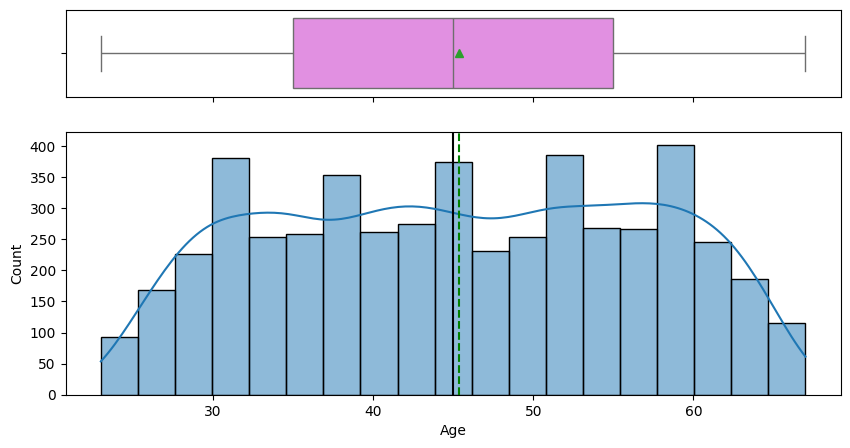

In [15]:
# Checking the distribution of 'Age' column:
histogram_boxplot(df, 'Age', figsize=(10,5), kde = True)

- *Averaged age of the customers is 45 year*
- *The distribution is symmetric*

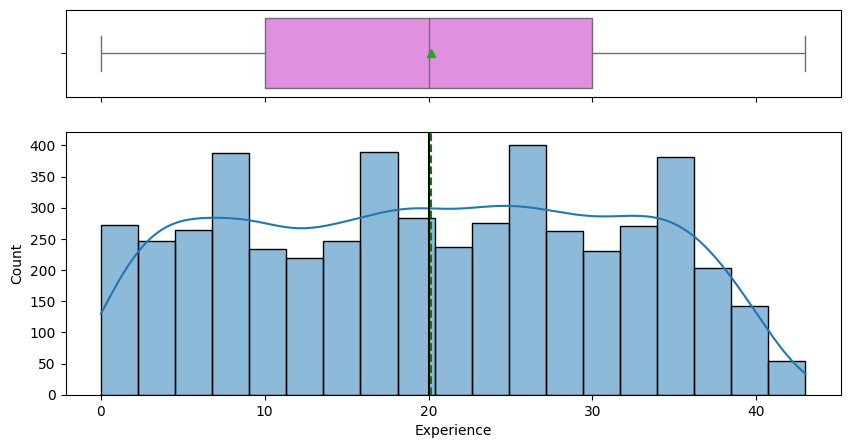

In [16]:
# Checking the distribution of 'Experience' column:
histogram_boxplot(df,'Experience', figsize=(10,5), kde = True)

- *Average of the experience is 20 year*
- *The distribution is symmetric*

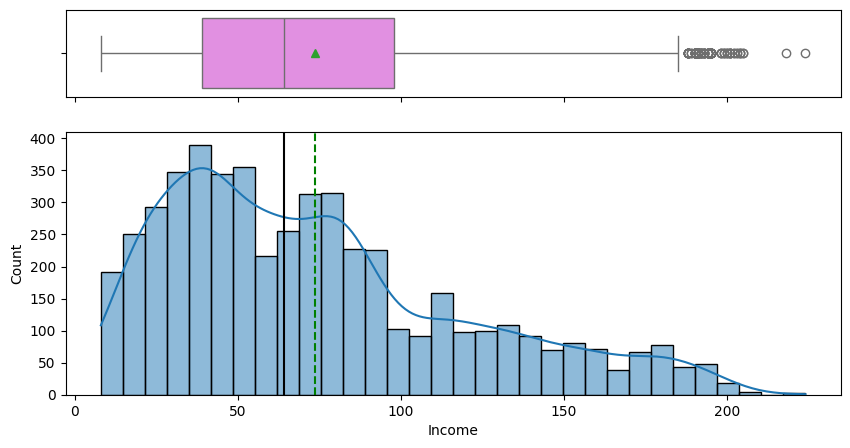

In [17]:
# Checking the distribution of 'Income' column:
histogram_boxplot(df,'Income', figsize=(10,5), kde = True)

- *Average income is about 76000 dollars, median value is about 64000 dollars*
- *The distribution is right-skewed with some outliers*

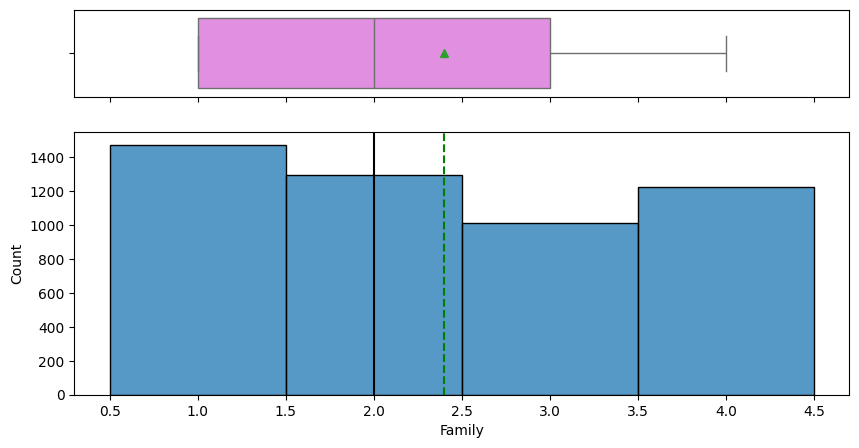

In [18]:
# Checking the distribution of 'Family' column:
histogram_boxplot(df,'Family', figsize=(10,5), kde = False, discrete=True)

- *The average number of family members is 2.4*
- *The distribution is slightly right-skewed*

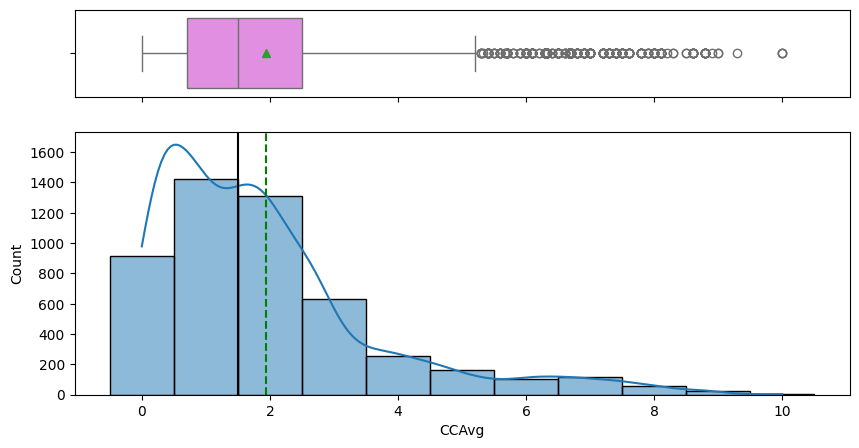

In [19]:
# Checking the distribution of 'CCAvg' column:
histogram_boxplot(df,'CCAvg', figsize=(10,5), kde = True, discrete=True)

- *The average spending on credit cards per month is 1,8 thousand dollars*
- *The distribution is right-skewed*

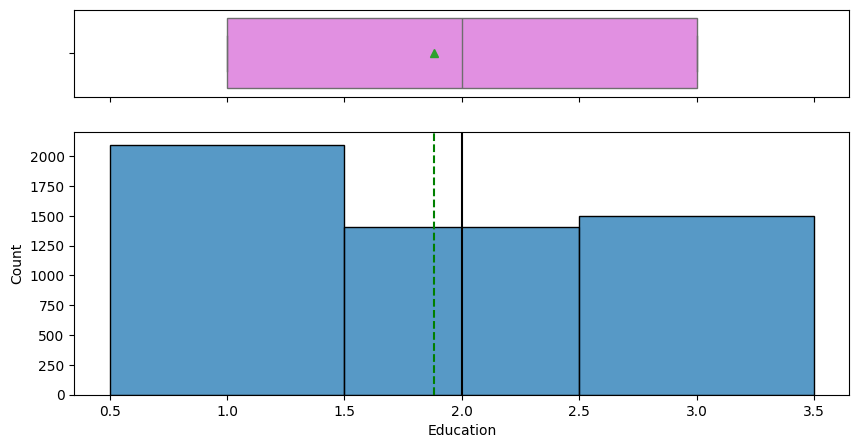

In [20]:
# Checking the distribution of 'Education' column:
histogram_boxplot(df,'Education', figsize=(10,5), discrete=True)

- *The average of the education level is around graduated (2)*
- *Most clients have an undergraduate level much more than graduated or advanced*

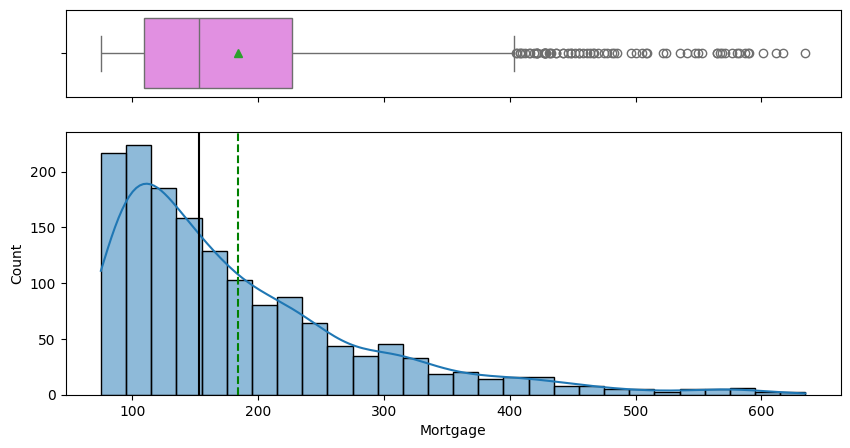

In [21]:
# let's cut 0 level in the distribution of the mortgage loans:
histogram_boxplot(df[df['Mortgage'] > 0], 'Mortgage', figsize=(10,5), kde = True)

- *The distribution shows that mortgage loan begins from 50 thousand dollars, and lies above 400 thousand dollars with a significant amount of the outliers*

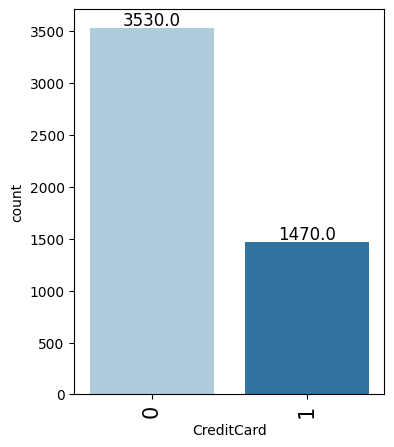

CreditCard
0    0.706
1    0.294
Name: proportion, dtype: float64

In [22]:
# Check how much customers have credit cards
labeled_barplot(df, 'CreditCard')
df['CreditCard'].value_counts(normalize=True)

- *70% of the customers don't use other than All Life bank's credit cards and would be considered as potential clients*

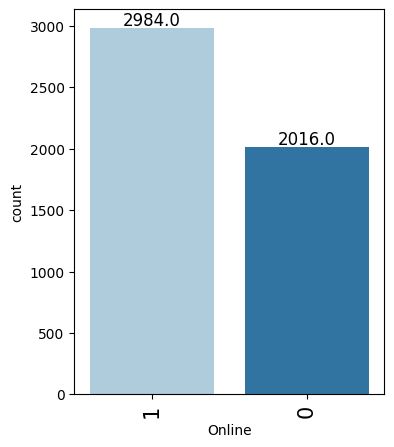

Online
1    0.5968
0    0.4032
Name: proportion, dtype: float64

In [23]:
# Check how much customers use internet online facilities
labeled_barplot(df, 'Online')
df['Online'].value_counts(normalize=True)

- *40% of the customers don't use internet for accessing account*

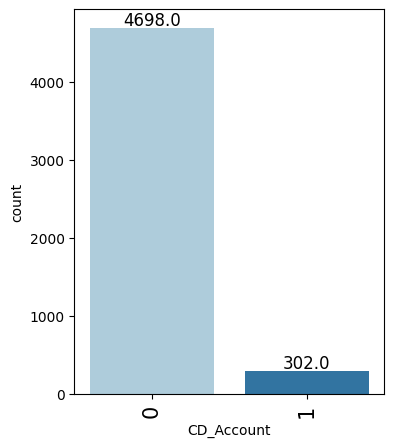

CD_Account
0    0.9396
1    0.0604
Name: proportion, dtype: float64

In [24]:
# Check how much customers have CD Account
labeled_barplot(df, 'CD_Account')
df['CD_Account'].value_counts(normalize=True)

- *Only 6% of the customers  have a certificate of deposit account*

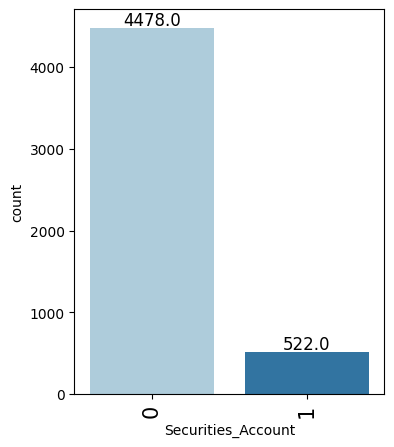

Securities_Account
0    0.8956
1    0.1044
Name: proportion, dtype: float64

In [25]:
# Check how much customers have securities account
labeled_barplot(df, 'Securities_Account')
df['Securities_Account'].value_counts(normalize=True)

- *Only 10% of the customers  have a securities account*

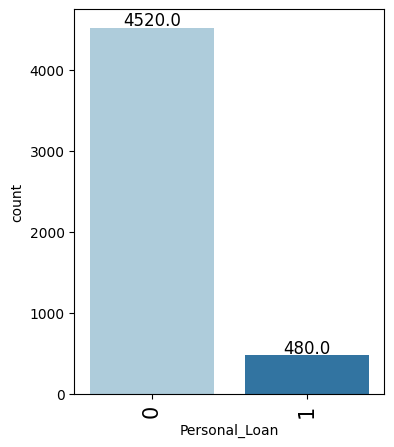

Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64

In [26]:
# Check how much customers accepted a personal loan
labeled_barplot(df, 'Personal_Loan')
df['Personal_Loan'].value_counts(normalize=True)

- *Only 10% of the customers  have a personal loan*

### Multi/Bivariate Analysis between targeted Personal Loans and some important categories:

-*Let's check the dependencies between the targeting value the personal loan purchasing and other variables:*

<Axes: xlabel='Personal_Loan', ylabel='Age'>

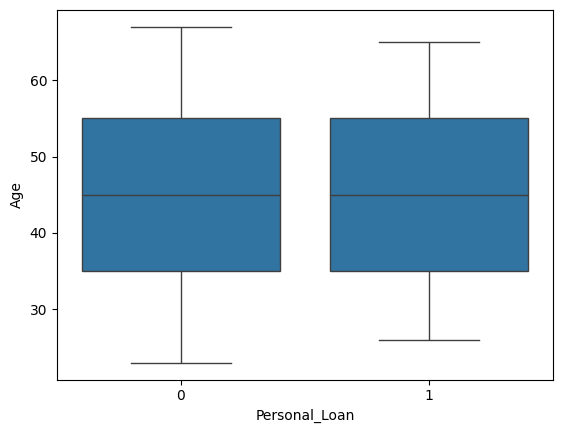

In [27]:
# Check how much depends on a personal loan and Age
sns.boxplot(df, x = "Personal_Loan", y = "Age")

- *The average age for customers match both categories - 30 years, with low and high limits for customers without personal loans a little bit more. But there is no significant difference.*

<Axes: xlabel='Personal_Loan', ylabel='Experience'>

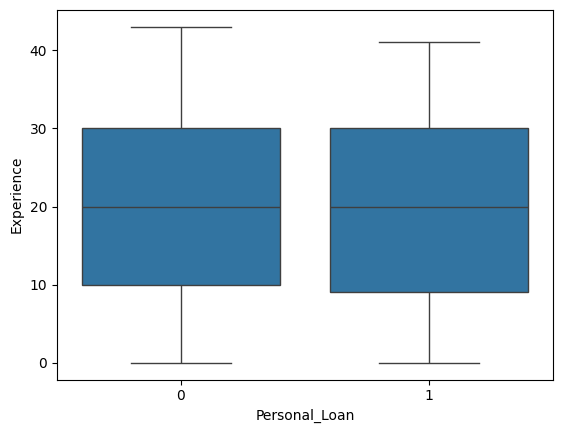

In [28]:
# Check how much depends on a personal loan and an experience
sns.boxplot(df, x = "Personal_Loan", y = "Experience")

- *The average experience for customers match both categories - 20 years. But there is no significant difference too.*

<Axes: xlabel='Personal_Loan', ylabel='Income'>

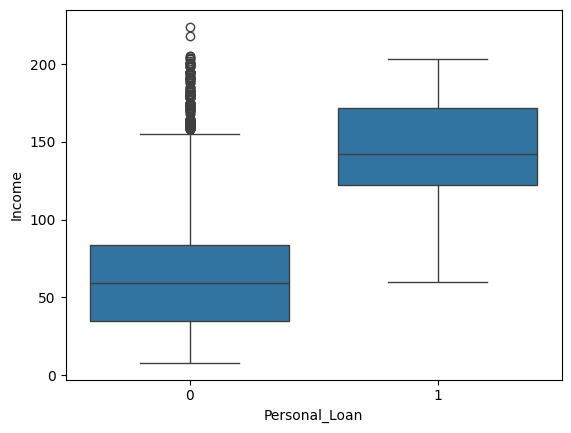

In [29]:
# Check how much depends on a personal loan and an annual income
sns.boxplot(df, x = "Personal_Loan", y = "Income")

- *The average income for customers who use personal loans are significantly higher than customers who don't use it.*

<Axes: xlabel='Personal_Loan', ylabel='Family'>

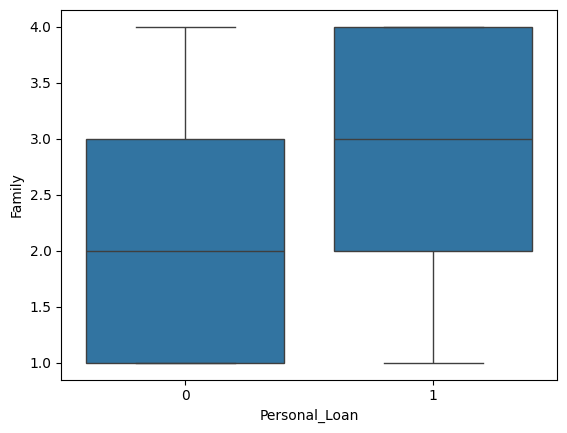

In [30]:
# Check how much depends on a family size an annual income
sns.boxplot(df, x = "Personal_Loan", y = "Family")

- *The average income for customers who have averaged family size 3 is higher than the average size of 2.*

<Axes: xlabel='Personal_Loan', ylabel='CCAvg'>

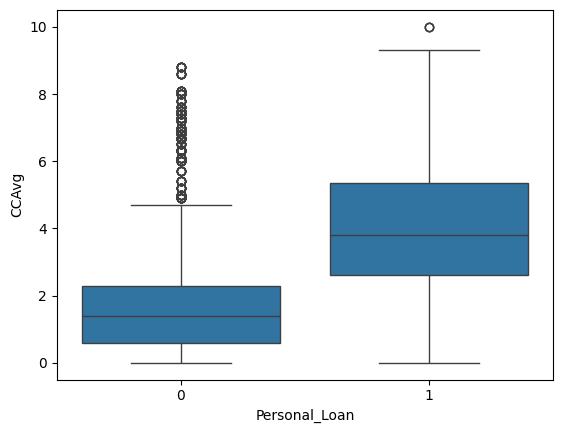

In [31]:
# Check how much depends on a family size and average spending on credit cards per month
sns.boxplot(df, x = "Personal_Loan", y = "CCAvg")

- *Customers accepted personal loan have average spending on credit cards per month is about 4000 dollars.*

Education         1     2     3   All
Personal_Loan                        
All            2096  1403  1501  5000
0              2003  1221  1296  4520
1                93   182   205   480
------------------------------------------------------------------------------------------------------------------------


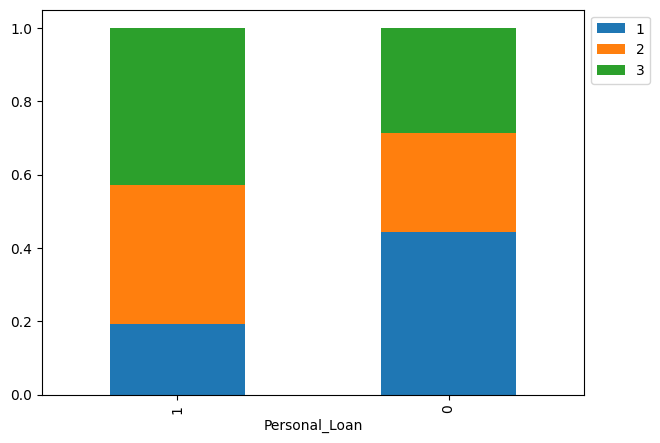

In [32]:
# Check how much depends on a personal loan and Education
stacked_barplot(df, "Personal_Loan", "Education")

- *Customers with Undergraduate level have fewer personal loans*
- *More personal loans have customers with Graduate and Professional level ~80%*
- *50% of undergraduate level and 50% of graduate and advanced levels have no personal loans*

<Axes: xlabel='ZIPCode', ylabel='count'>

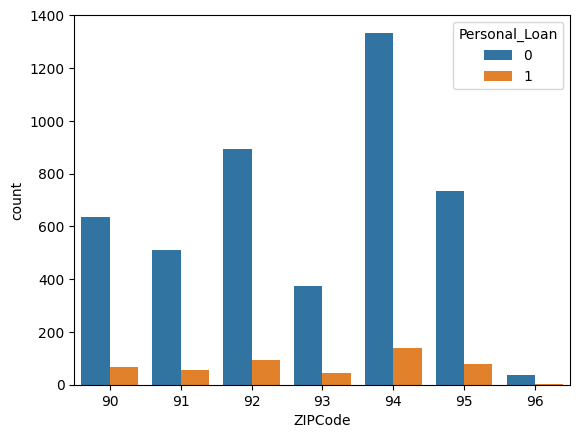

In [33]:
# Check how much depends a personal loan and ZIP codes
sns.countplot(df, x = 'ZIPCode', hue="Personal_Loan")

- *Most potential clients are distributed in zip codes 94, 95, 92, and 90*

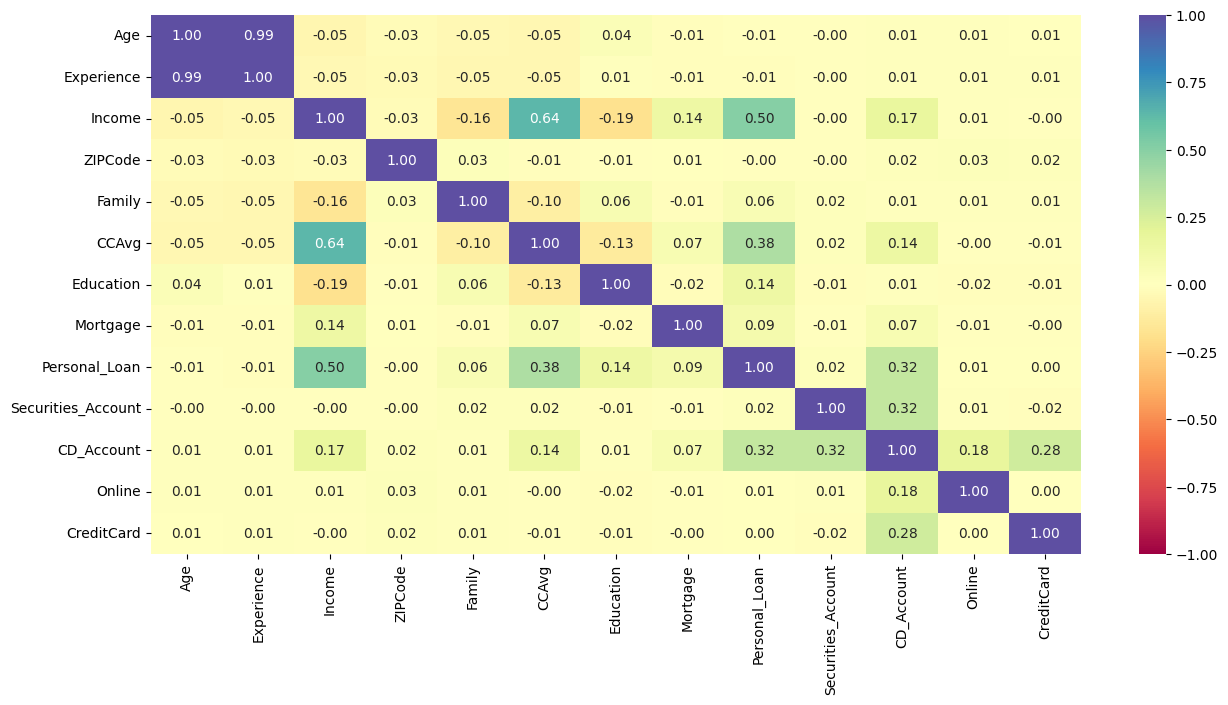

In [78]:
# Check the correlation among all categories escept IDs
features_list = df.copy()
plt.figure(figsize=(15, 7))
sns.heatmap(features_list.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- *Experience and age has strong correlation, because they are dependant values - experience is in direct ratio with age.*
- *Most correlation have CCAvg and Income*
- *Personal Loan has the most correlation with Income, but not strong*

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### Outlier Detection

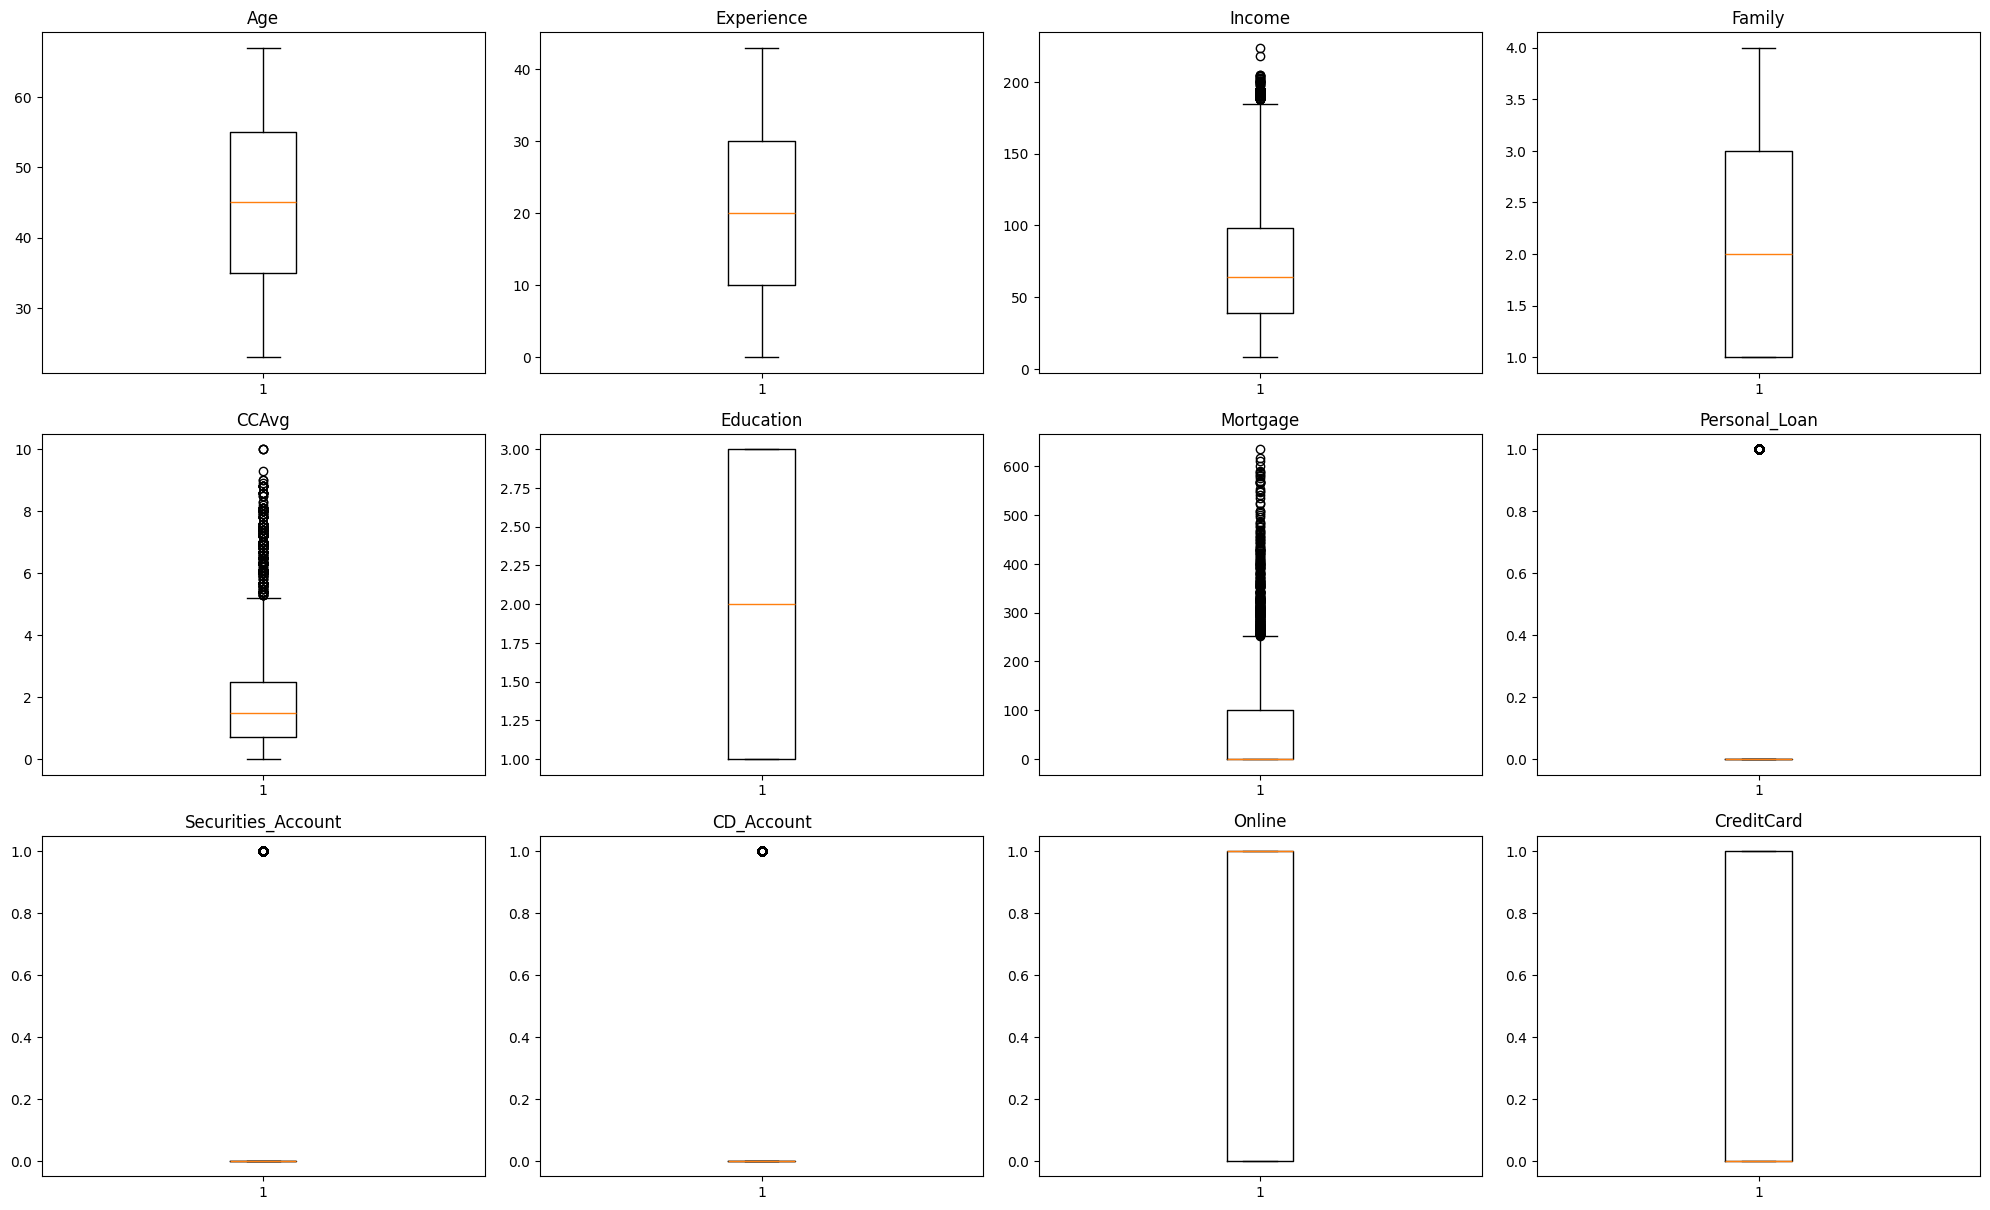

In [35]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 20))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- *Income, CCAvg, and Mortgage have some upper outliers.*
- *Personal Loan, Securities Account, CD Account are categorical values therefore depicted as discrete outliers and will be ignored in the treatment.*

### Outlier Treatment

In [36]:
# helper function to treat outliers by flooring and capping
def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df

In [37]:
# treatment non categorical columns:
outliers_col = ['Income', 'CCAvg', 'Mortgage']
for col in outliers_col:
        df = treat_outliers(df, col)

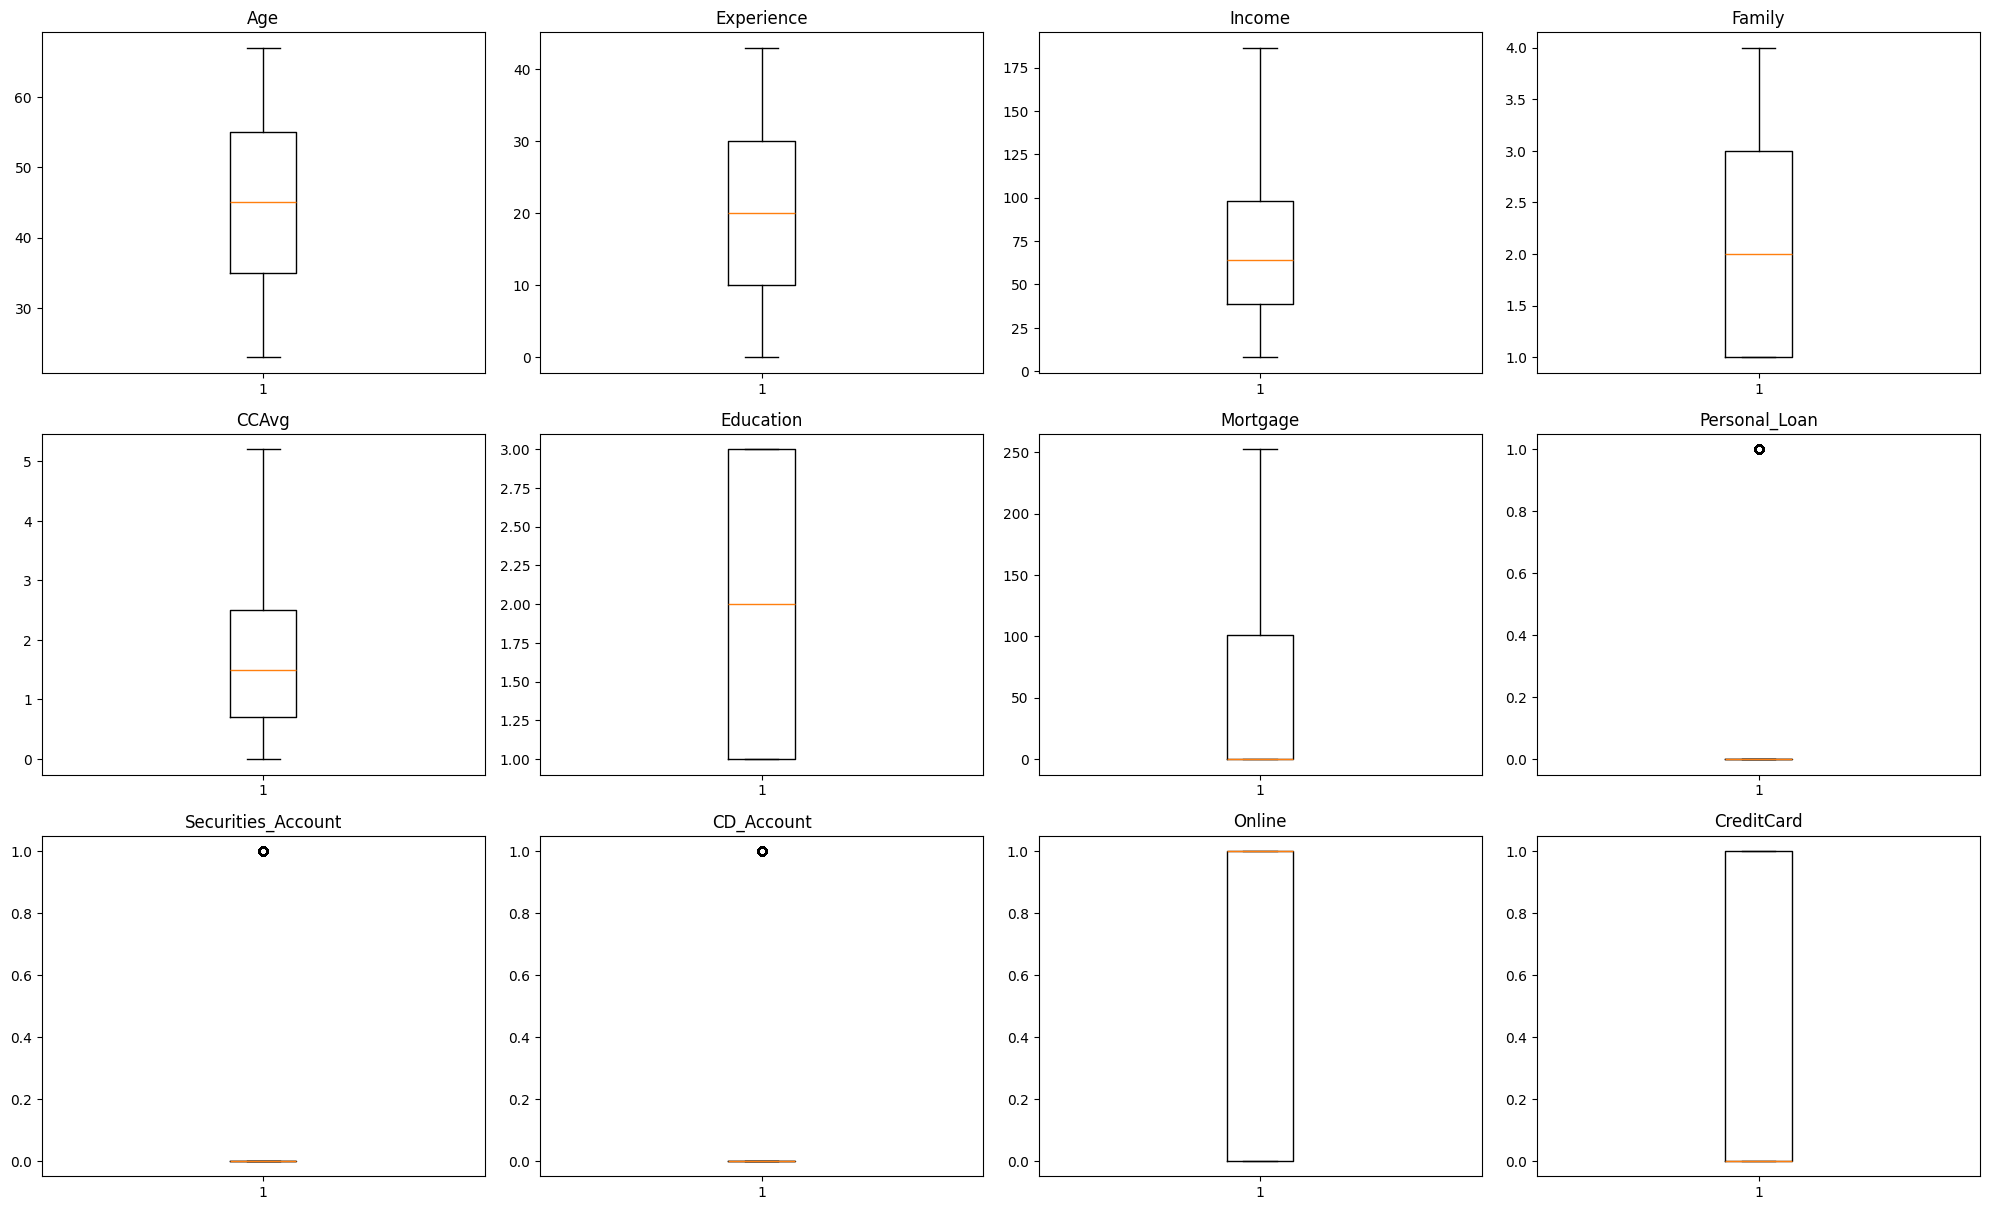

In [38]:
# let's plot a boxplot to check the treatment result
plt.figure(figsize=(20, 20))

for i, var in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[var], whis=1.5)
    plt.tight_layout()
    plt.title(var)

plt.show()

- *The outliers are assigned to the wiskers*

### Data Preparation for Modeling

In [39]:
# let,s create training and tests test
# specifying the independent  and dependent variables
X = df.drop(["Personal_Loan"], axis=1)
Y = df["Personal_Loan"]
# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49.0,91,4,1.6,1,0.0,0,1,0,0,0
1,45,19,34.0,90,3,1.5,1,0.0,0,1,0,0,0
2,39,15,11.0,94,1,1.0,1,0.0,0,0,0,0,0
3,35,9,100.0,94,1,2.7,2,0.0,0,0,0,0,0
4,35,8,45.0,91,4,1.0,2,0.0,0,0,0,0,1


In [40]:
print("Shape of training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of training set :  (3500, 12)
Shape of test set :  (1500, 12)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

- *Bank would want Recall to be maximized, the greater the Recall, the higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives. Defaulted customers cost more losses than not offered clients. However, checking accuracy and precision is necessary for estimating losses of the resources and opportunities for some false predictions.*


### Classification Model Building

In [41]:
# let's use the Decision Tree Classifier
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Model Performance Check

-*Let's define some helper functions to check the performance of the model using different metrics:-*
  *accuracy, recall, precision and f1 score:*

In [42]:
# defining a function to compute different metrics to check performance of a classification model
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = metrics.accuracy_score(target, pred)  # to compute Accuracy
    recall = metrics.recall_score(target, pred)  # to compute Recall
    precision = metrics.precision_score(target, pred)  # to compute Precision
    f1 = metrics.f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (6,4))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Build Decision Tree Model

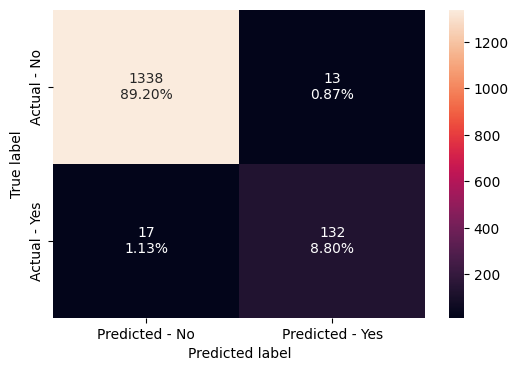

In [43]:
# let's check perfomance with the confusion matrix
make_confusion_matrix(model, y_test)

In [44]:
# let's check accuracy, recall, precosion and F1 score on train set
model_performance_classification_sklearn(model, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [45]:
# let's check accuracy, recall, precosion and F1 score on test set
model_performance_classification_sklearn(model, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.98,0.885906,0.910345,0.897959


- *The high values of recall on training and low-value test set show overfitting of the model, it needs a further performance improvement.*

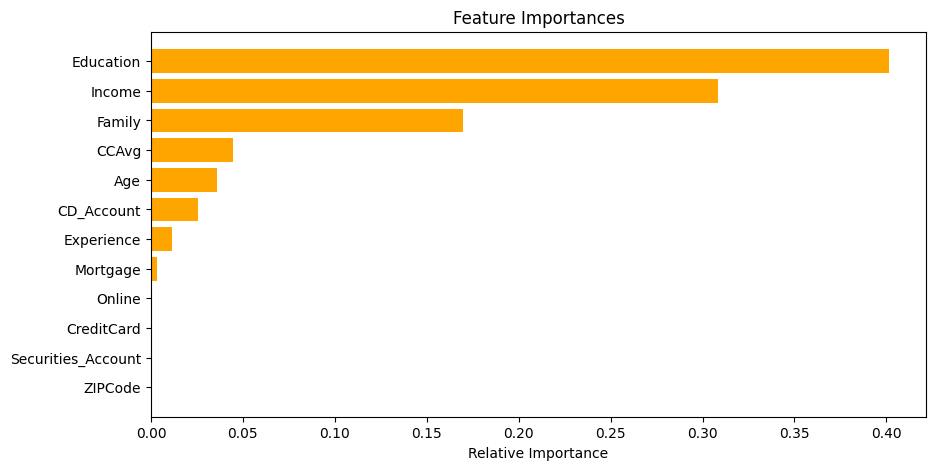

In [46]:
# checking feature importance
feature_names = list(X.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [47]:
# print reduced overfitting of the decision tree
# Text report showing the rules of a decision tree -
print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.401465
Income              0.308336
Family              0.169593
CCAvg               0.044408
Age                 0.035708
CD_Account          0.025711
Experience          0.011203
Mortgage            0.003014
Online              0.000561
ZIPCode             0.000000
Securities_Account  0.000000
CreditCard          0.000000


- *Education, Income, Family size are most important features of the decision tree.*

#### Visualizing the Decision Tree

['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


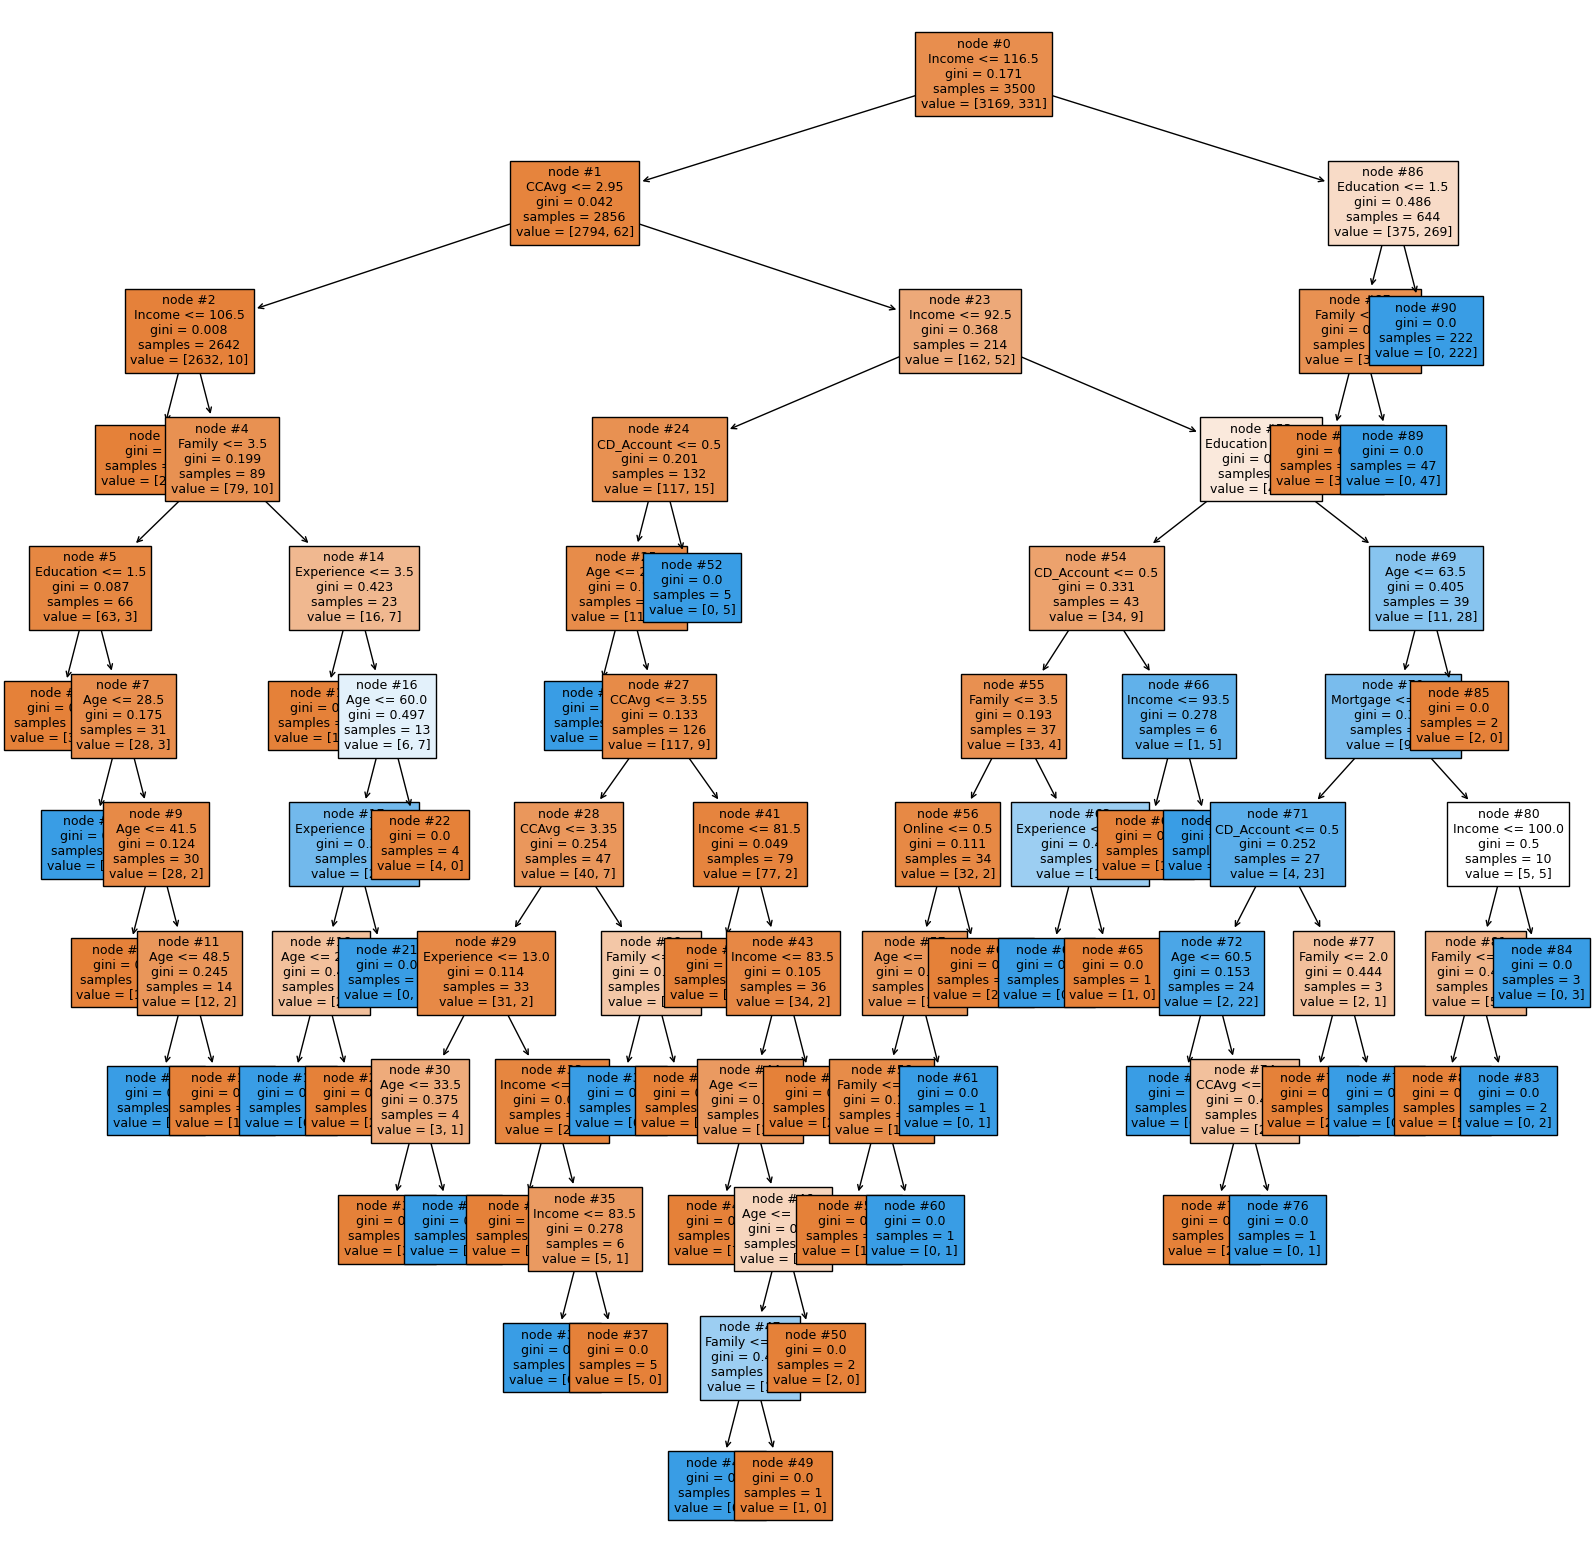

In [48]:
# print overfitted decision tree
print(feature_names)
plt.figure(figsize=(20,20))
tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=None)
plt.show()

### Model Performance Improvement

#### Reducing over fitting with pre-prunning model:

-*Let's try limiting the max_dept of the tree to 3:*

In [49]:
model_reduced_overfitting = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
model_reduced_overfitting.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

#### Checking perfomance of pre-pruned model

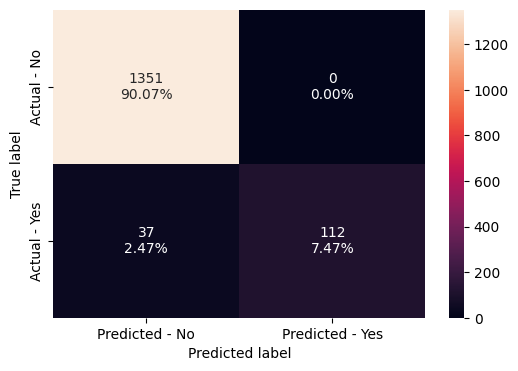

In [50]:
# let's check perfomance with the confusion matrix
make_confusion_matrix(model_reduced_overfitting, y_test)

In [51]:
# let's check accuracy, recall, precosion and F1 score on train set
model_performance_classification_sklearn(model_reduced_overfitting, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.982286,0.812689,1.0,0.896667


In [52]:
# let's check accuracy, recall, precosion and F1 score on test set
model_performance_classification_sklearn(model_reduced_overfitting, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.975333,0.751678,1.0,0.858238


- *Recall on the train set was reduced from 1 to 0.81, meaning the model is no longer overfitted, however, precision has the highest score, looks like some important information was lost that led to underfitting.*

#### Visualizing the Decision Tree of pre-pruned model

['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


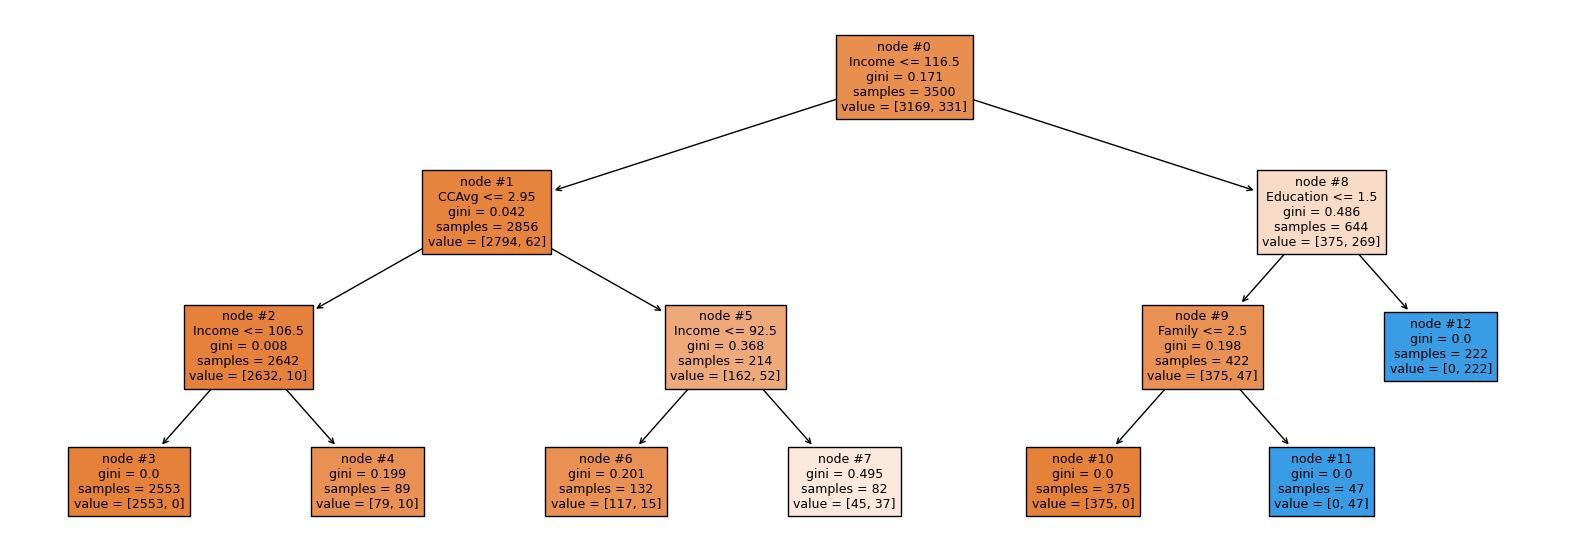

In [53]:
# print reduced overfitting of the decision tree
print(feature_names)
plt.figure(figsize=(20,7))
tree.plot_tree(model_reduced_overfitting,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=None)
plt.show()

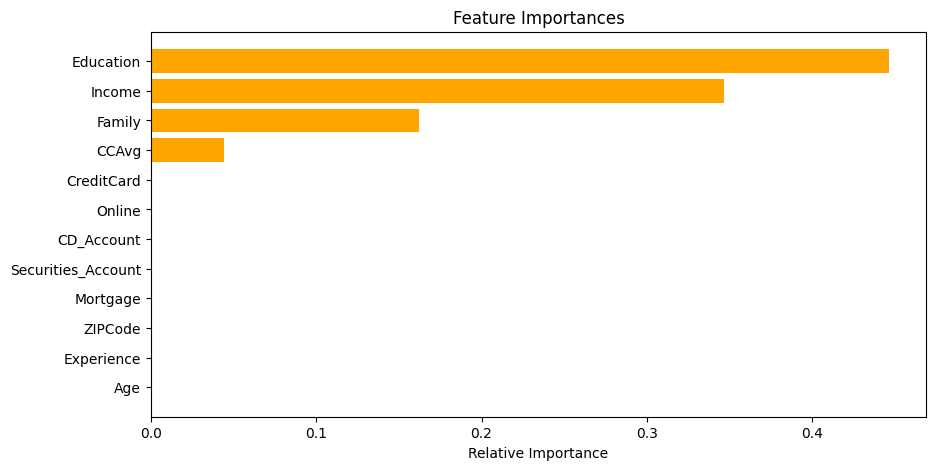

In [54]:
# checking feature importance
feature_names = list(X.columns)
importances = model_reduced_overfitting.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [55]:
# Text report showing the rules of a decision tree
print(tree.export_text(model_reduced_overfitting,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [79.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- weights: [117.00, 15.00] class: 0
|   |   |--- Income >  92.50
|   |   |   |--- weights: [45.00, 37.00] class: 0
|--- Income >  116.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 47.00] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [0.00, 222.00] class: 1



- *Recall of the test set has got worse therefore let's improve the model further.*

### Reducing over fitting with Using GridSearch for Hyperparameter tuning:

In [56]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(1,10),
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

#### Checking perfomance of model Hyperparameter tuning

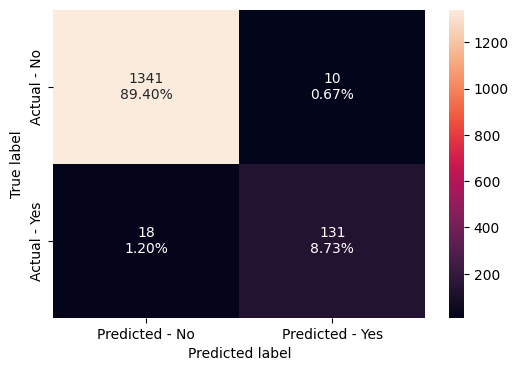

In [57]:
# let's check perfomance with the confusion matrix
make_confusion_matrix(estimator, y_test)

In [58]:
# let's check accuracy, recall, precosion and F1 score on train set
model_performance_classification_sklearn(estimator, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.989714,0.927492,0.962382,0.944615


In [59]:
# let's check accuracy, recall, precosion and F1 score on test set
model_performance_classification_sklearn(estimator, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.981333,0.879195,0.929078,0.903448


- *Recall on the train set was increased from 0.81 to 0.92, that shows improving, but still not enough for testing set.*

#### Visualizing the Decision Tree with tuned hypermarameters

['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


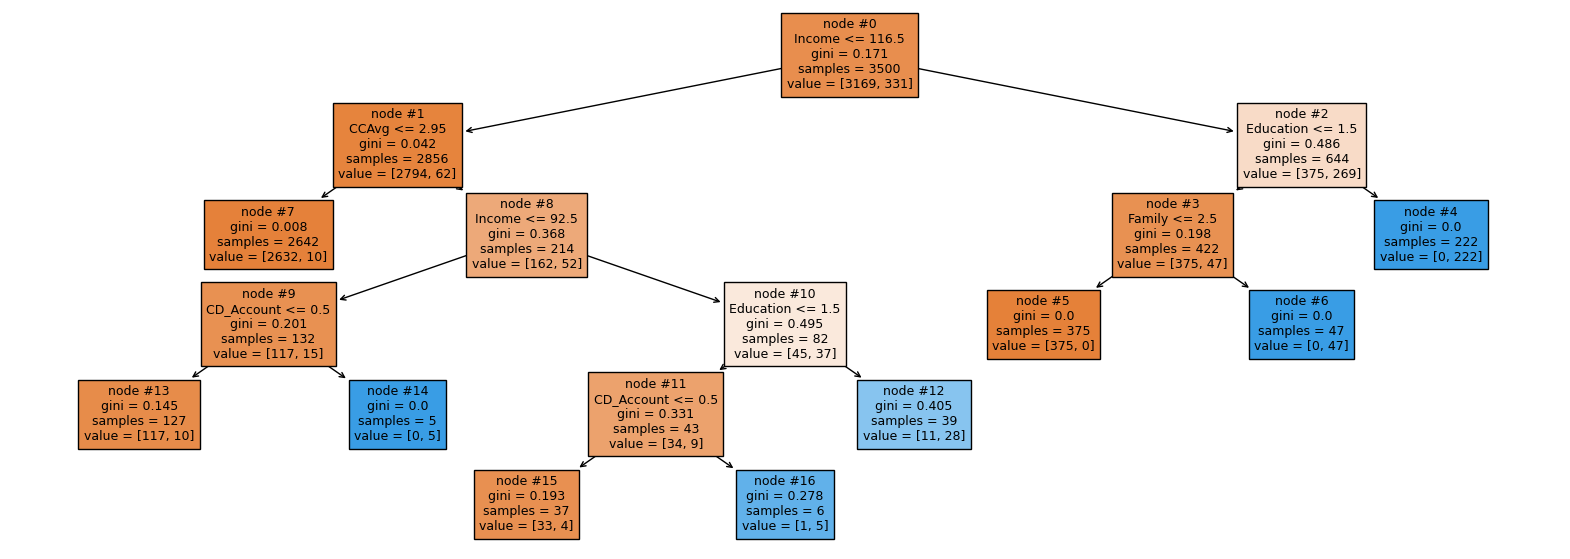

In [60]:
# print reduced overfitting of the decision tree
print(feature_names)
plt.figure(figsize=(20,7))
tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=None)
plt.show()

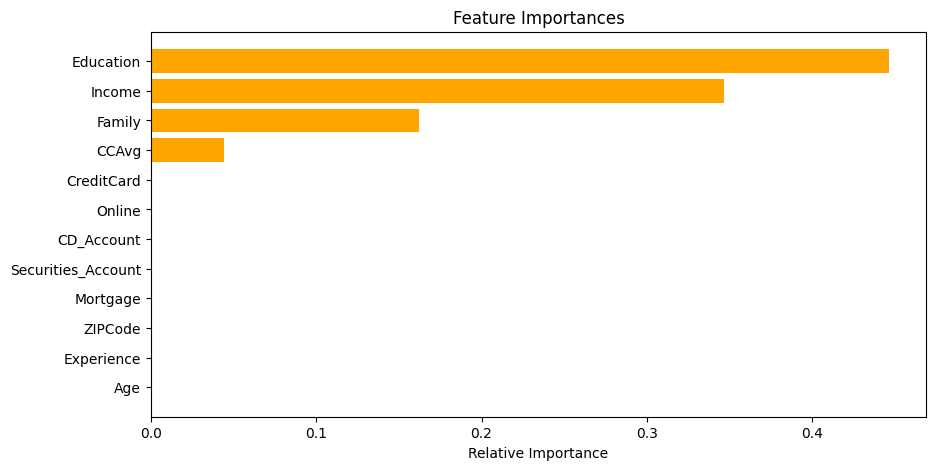

In [61]:
# checking feature importance
feature_names = list(X.columns)
importances = model_reduced_overfitting.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [62]:
# Text report showing the rules of a decision tree
print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|   |   |   |--- Education >  1.50
|   |   |   |   |--- weights: [11.00, 28.00] class: 1
|--- Income >  116.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 47.00] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [0.00, 222.00] class: 1



- *Recall on test and training set of the hypertuned model has improved.*

### Cost complexity post-pruning with total impurity of leaves and effective alphas of pruned tree:

In [63]:
# checking alphas and impurities
ccp_model = DecisionTreeClassifier(random_state=1)
path = ccp_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [64]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000223,0.001114
2,0.000268,0.002188
3,0.000359,0.003263
4,0.000381,0.003644
5,0.000381,0.004025
6,0.000381,0.004406
7,0.000381,0.004787
8,0.000409,0.006423
9,0.000476,0.006900


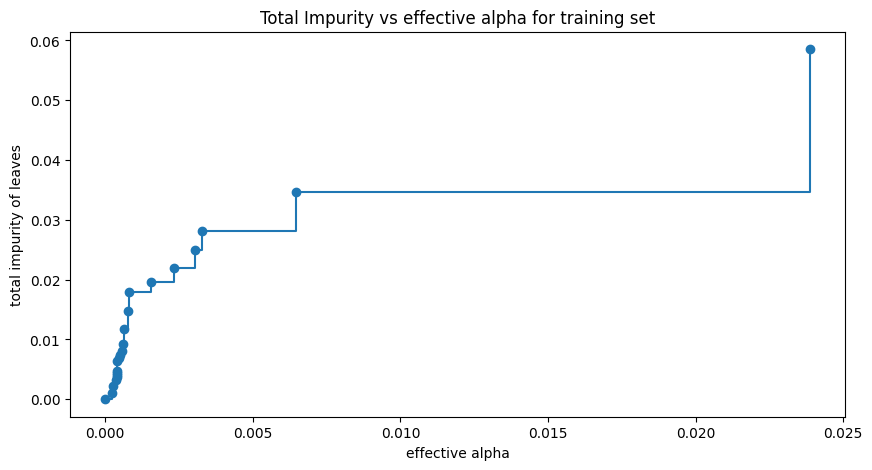

In [65]:
# ploting of effective alpha
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

-*Let's train the model with the effectives alphas, except last one that prunes whole tree:*

In [66]:
# Let's train the decision tree using the effective alphas
ccp_models = []
for ccp_alpha in ccp_alphas:
    ccp_model = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    ccp_model.fit(X_train, y_train)
    ccp_models.append(ccp_model)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      ccp_models[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


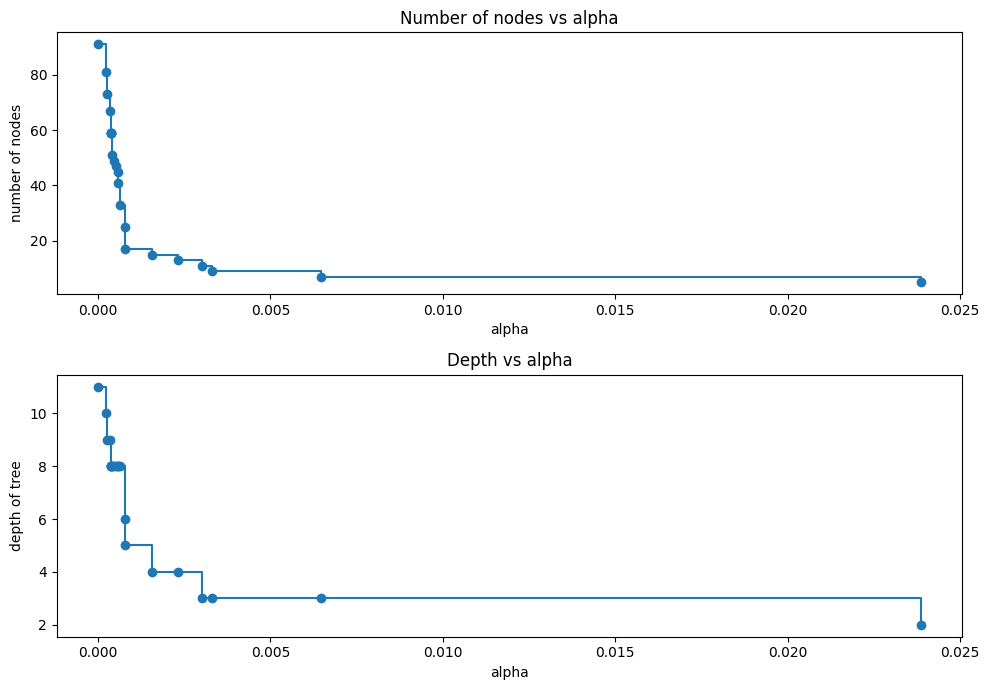

In [67]:
# training the model exept last alpa
ccp_models = ccp_models[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [ccp_model.tree_.node_count for ccp_model in ccp_models]
depth = [ccp_model.tree_.max_depth for ccp_model in ccp_models]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Checking perfomance of cost complexity post-pruning

-*Let's retieve the recall scores for the different alphas:*

In [68]:
# push recalls in the list for training and test sets:
recall_train=[]
for ccp_model in ccp_models:
    pred_train3=ccp_model.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)
    
recall_test=[]
for ccp_model in ccp_models:
    pred_test3=ccp_model.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

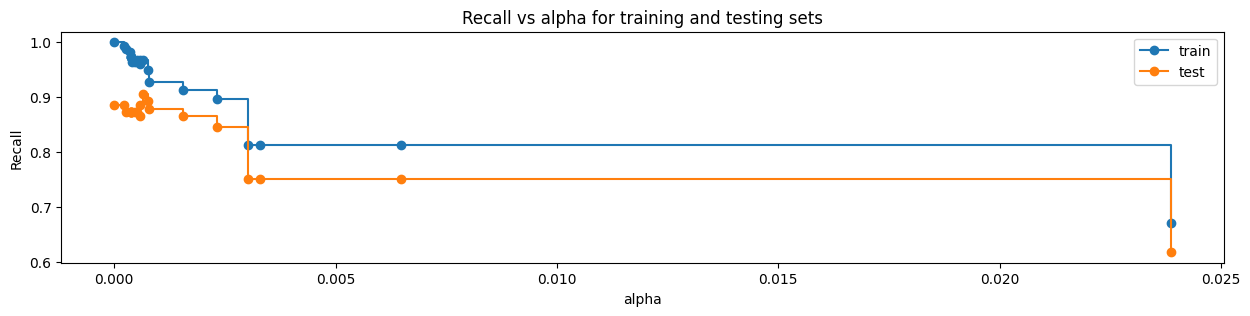

In [69]:
# plot results
fig, ax = plt.subplots(figsize=(15,3))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

-*let's create the model with highest train and test recall:*

In [70]:
index_best_model = np.argmax(recall_test)
best_model = ccp_models[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)


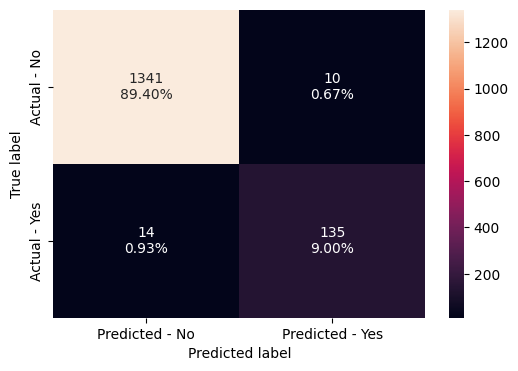

In [71]:
# Make the confusion matrix
make_confusion_matrix(best_model, y_test)

In [72]:
# let's check accuracy, recall, precision  and F1 score on train set
model_performance_classification_sklearn(best_model, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.992857,0.966767,0.958084,0.962406


In [73]:
# let's check accuracy, recall, precision and F1 score on train set
model_performance_classification_sklearn(best_model, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.984,0.90604,0.931034,0.918367


- *Recall on the train set was increased compared with the previous model from 0.92 to 0.967 and on the test set from 0.88 up to 0.91*

### Visualizing the Decision Tree with post-pruned model with teh effective alphas

['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


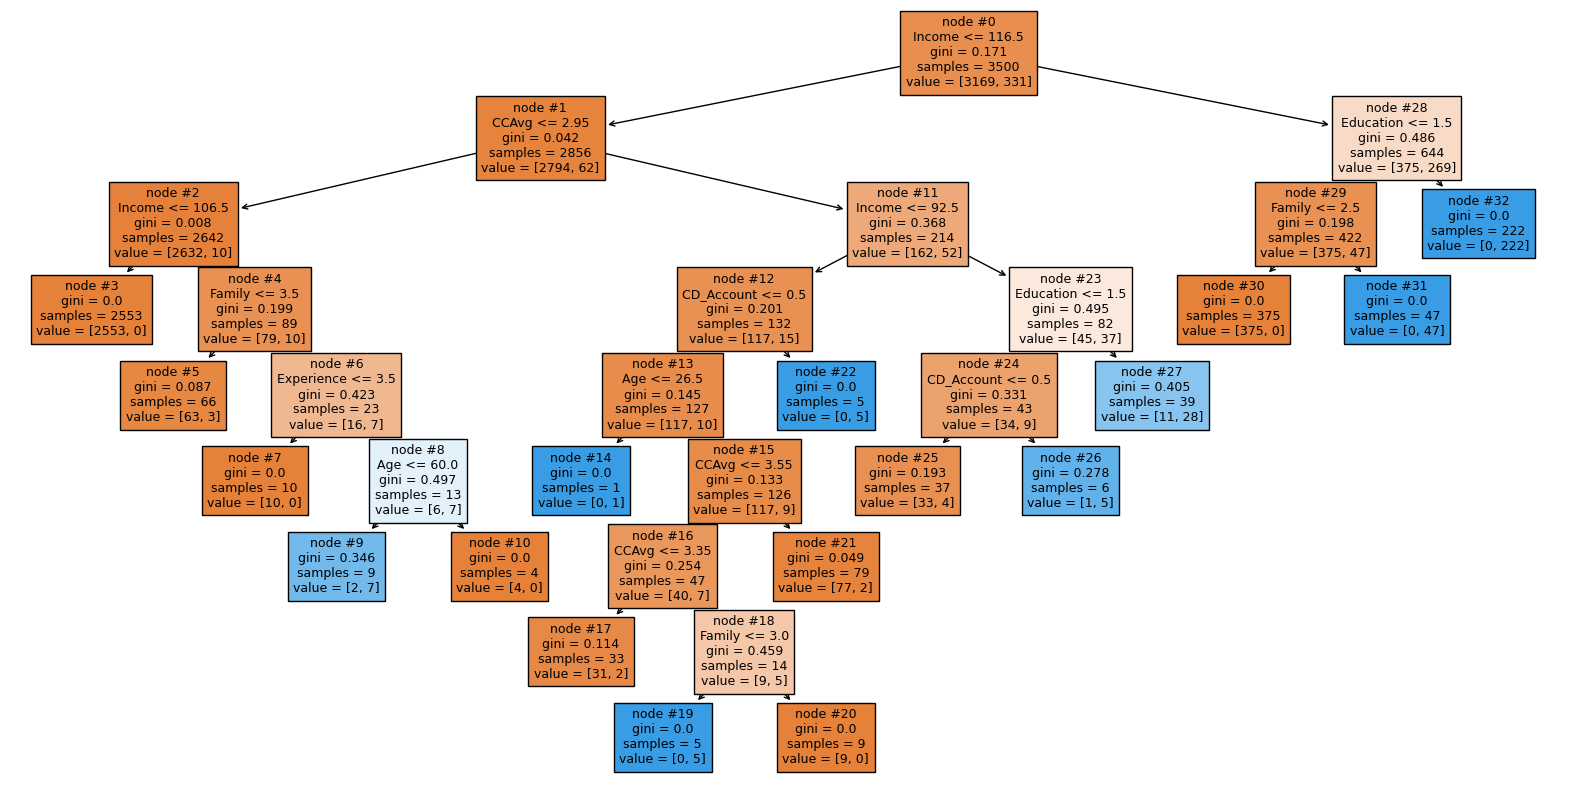

In [74]:
# print reduced overfitting of the decision tree
print(feature_names)
plt.figure(figsize=(20,10))
tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=None)
plt.show()

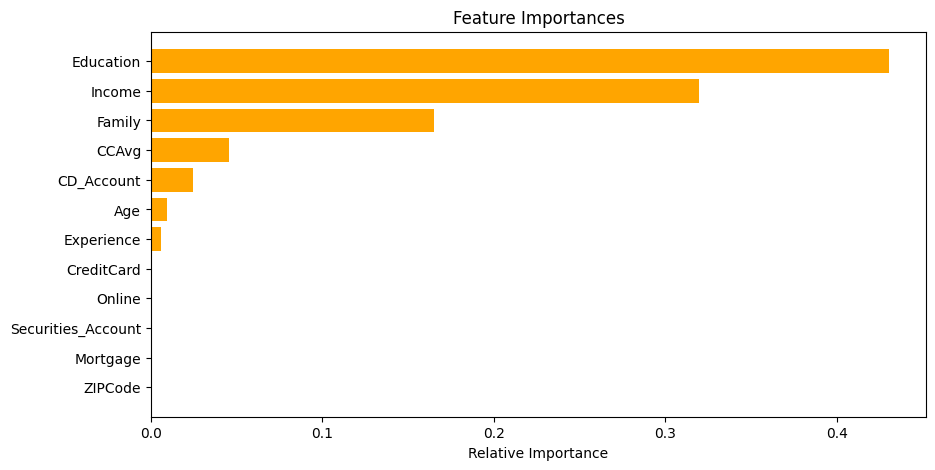

In [75]:
# checking feature importance
feature_names = list(X.columns)
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [76]:
# Text report showing the rules of a decision tree
print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [63.00, 3.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Experience <= 3.50
|   |   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |   |   |--- Experience >  3.50
|   |   |   |   |   |--- Age <= 60.00
|   |   |   |   |   |   |--- weights: [2.00, 7.00] class: 1
|   |   |   |   |   |--- Age >  60.00
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |--- CCAvg <= 3.35
|   |   |   |   |   |   |   |--- weights: [31.00, 2.00] class: 0
|   |   |   |   |   |   |--- CCAvg 

## Model Comparison and Final Model Selection

In [77]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with restricted maximum depth (pre-pruned)','Decision tree with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[1,0.81,0.92,0.97], 'Test_Recall':[0.89,0.75,0.88,0.91]})
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.00,0.89
1,Decision tree with restricted maximum depth (p...,0.81,0.75
2,Decision tree with hyperparameter tuning,0.92,0.88
3,Decision tree with post-pruning,0.97,0.91


- *Post-prunnung method is giving the highest recall on the test set, therefore this model will be choisen for use.*

## Actionable Insights and Business Recommendations


- *The best model predicts that loan will be accepted with 0.91 score on the training set.*
- *The coefficients of Education, Income, and Family size will lead to an increase in the chances of a person accepting a personal loan.*
- *The coefficients CCAvg, Age, CCD_Account and Experience will moderately affect the likelihood that a person will take out a personal loan.*
- *The rest coefficients don't affect on accepting the personal loan*

#### Recommendations:

- *The bank can focus on clients with undergraduate education levels, and promote increasing value of clients of undergraduate and graduate levels.*
- *The average income level of less than 50000 dollars can be considered as potential clients for personal loans.*
- *The group of clients with income above 150000 dollars, allocated in the outliers area and don't have personal loans, can be considered as potential clients.*
- *The group of clients with an average family size of less than can be considered potential clients for personal loans.*
- *Clients with CCAvg less than 1,5000 per month can be targeted as potential clients for personal loans.*

___